# Network Structure: Distances and correlations
 Jefter Santiago Mares \\
 jefter@usp.br \\
 nº USP: 12559016 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import pearsonr

In [41]:
def setup_graph(g):
  print("Original Network")
  print("Nº of nodes: ", len(g))
  print("Nº of edges: ", g.number_of_edges())
  
  g = g.to_undirected()
  g.remove_edges_from(nx.selfloop_edges(g))

  print("Biggest connected component")
  gcc = sorted(nx.connected_components(g), key=len, reverse=True)
  g = g.subgraph(gcc[0])
  print("Nº of nodes: ", len(g))
  print("Nº of edges: ", g.number_of_edges())

  return g

# 1 - Average shortest path length and network diameter - `Hamsterster` Network

In [47]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/Project 2/data/hamsterster.txt", nodetype=int)

If the graph is connected, then i calculate the shortest path lengths. If not i'll do it for the biggest connected component.

In [52]:
g = setup_graph(g)

Original Network
Nº of nodes:  1788
Nº of edges:  12476
Biggest connected component
Nº of nodes:  1788
Nº of edges:  12476


In [53]:
l = nx.average_shortest_path_length(g)
print("Average shortest path length: ", "%3.4f"%l)

d = nx.diameter(g)
print('Network diameter:', d)

Average shortest path length:  3.4526
Network diameter: 14


# 2 - Mean and variance of shortest distances - `USairport500` Network

In [57]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/Project 2/data/USairport500.txt", nodetype=int)

In [58]:
g = setup_graph(g)

Original Network
Nº of nodes:  500
Nº of edges:  2980
Biggest connected component
Nº of nodes:  500
Nº of edges:  2980


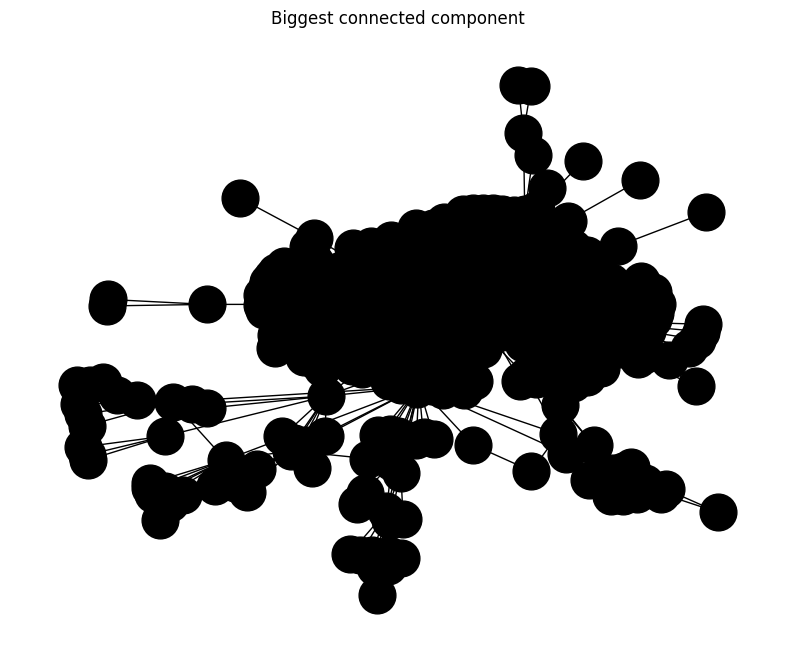

In [59]:
plt.figure(figsize=(10, 8))
plt.title("Biggest connected component")
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color="Black",font_color="b",edge_color="Black", font_size=1, node_size=700, with_labels = False)

In [60]:
avg = nx.average_shortest_path_length(g)
print("Average shortest path length: ", avg)

Average shortest path length:  2.9910300601202406


Generating the shortest distances using the `Floyd-Warshall` algorithm and calculating the mean and variance of it.

In [61]:
X = np.array(nx.floyd_warshall_numpy(g))
Y = []
# Appends the values from the upper triangle of the 
# distances matrix.
for i in range(len(X)):
  for j in range(i+1, len(X)):
    Y.append(X[i][j])

print("Mean = ", "%1.2f"%np.mean(Y))
print("Variance = ", "%1.2f"% np.var(Y))

Mean =  2.99
Variance =  0.82


# 3 - Assortativity coefficient - `Advogato` Network

In [62]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/Project 2/data/advogato.txt", nodetype=int)
g = setup_graph(g)

Original Network
Nº of nodes:  6539
Nº of edges:  43277
Biggest connected component
Nº of nodes:  5042
Nº of edges:  39227


In [65]:
r = nx.degree_assortativity_coefficient(g)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.0957


# 4 - Shannon entropy for shotest paths lengths - `USairport500` Network


In [68]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/Project 2/data/USairport500.txt", nodetype=int)
g = setup_graph(g)

Original Network
Nº of nodes:  500
Nº of edges:  2980
Biggest connected component
Nº of nodes:  500
Nº of edges:  2980


In [78]:
path = dict(nx.shortest_path_length(g))
path = np.bincount([length for source in path for length in path[source].values()])

Pk = path / sum(path)
H = 0 
for p in Pk:
  if(p > 0):
    H = H - p * math.log(p, 2)

print("SHannon entropy of the shortest paths = ", "%1.2f"%H)

SHannon entropy of the shortest paths =  1.90


# 5 - Pearson correlation coefficient of the mean degree from k-nearest neighbors - `word_adjacencies` Network

In [81]:
g = nx.read_edgelist("/content/drive/MyDrive/Colab Notebooks/Complex Networks/Project 2/data/word_adjacencies.txt", nodetype=int)
g = setup_graph(g)

Original Network
Nº of nodes:  112
Nº of edges:  425
Biggest connected component
Nº of nodes:  112
Nº of edges:  425


In [90]:
knn = list(nx.average_neighbor_degree(g).values())
knn = np.array(knn)

vk = dict(g.degree())
vk = list(vk.values())

knnk = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)+1):
    aux = vk == k
    if(len(knn[aux]) > 0):
        #average clustering among all the nodes with degree k
        av_knn = np.mean(knn[aux]) 
        knnk.append(av_knn)
        ks.append(k)

corr, _ = pearsonr(ks, knnk)
print("Pearsons correlation =", "%1.3f"%corr)

Pearsons correlation = -0.711
